### How to handle categorical missing values
### Frequent category imputation 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('loan.csv')
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [5]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [6]:
df.shape

(1460, 4)

### Compute the frequency with every feature

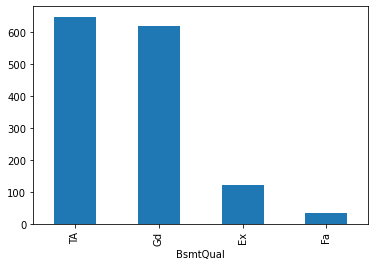

In [7]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

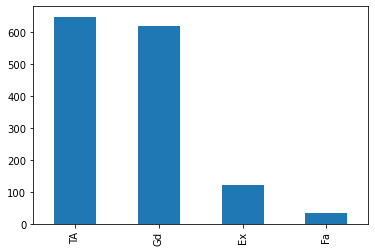

In [8]:
df.BsmtQual.value_counts().plot.bar() #or df['BsmtQual'].value_counts().plot.bar()

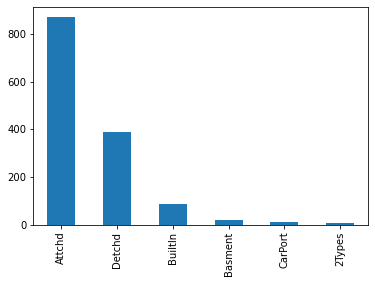

In [9]:
df['GarageType'].value_counts().plot.bar() #or df['GarageType'].mod()[0]

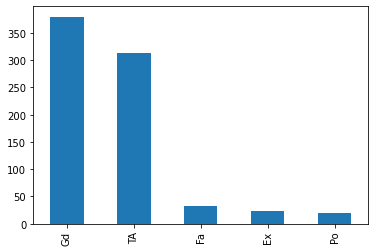

In [10]:
df.FireplaceQu.value_counts().plot.bar()

In [11]:
df.FireplaceQu.value_counts().index[0]

'Gd'

In [12]:
# Replacing Function
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [13]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

In [14]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [15]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
1. Easy to implement
2. Faster wayt to implement
#### Disadvantages
1. Sinse we are using the more frequent labels, it may use them in an over represented way if there are many NAN's 
2. It distors the relation  of the most frequent label   

### Adding a variable to capture NAN

In [16]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [29]:
frequent=df['BsmtQual'].mode()[0]
frequent

'TA'

In [22]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

<IPython.core.display.Javascript object>

In [23]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [30]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [32]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

<IPython.core.display.Javascript object>

In [35]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Supppose if you have more frequent categories, we just replace NAN with a new category

In [36]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [37]:
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [38]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,GarageType_newvar,FireplaceQu_newvar
0,Gd,NaN,Attchd,208500,Gd,Attchd,Missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


In [43]:
df.drop(['BsmtQual','GarageType','FireplaceQu'],axis=1,inplace=True)

In [44]:
df.head()

,SalePrice,BsmtQual_newvar,GarageType_newvar,FireplaceQu_newvar
0,208500,Gd,Attchd,Missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA
